# Mon Yuka 🥕 avec Python 🐍

Ce notebook vise à présenter pas à pas comment créer une application
interactive avec `Streamlit` reproduisant celle proposée sur
[myyuka.lab.sspcloud.fr](https://myyuka.lab.sspcloud.fr/).

Cet exercice est proposé dans le cadre du `Funathon` (hackathon non
compétitif) organisé en 2023 par l’Insee et le Ministère de
l’Agriculture sur le thème *“Du champ à l’assiette”*. Les autres sujets
sont disponibles sur le
[`Github InseeFrLab`](https://github.com/InseeFrLab/funathon2023).

En amont de l’exécution de ce notebook, il est recommandé d’installer
l’ensemble des packages utilisés dans ce projet avec la commande
suivante :

In [2]:
pip install -r requirements.txt

# Objectif et approche pédagogique

L’objectif de ce projet est d’apprendre à utiliser `Python` pour créer
des applications réactives avec `Streamlit` mais aussi de se
familiariser à la manipulation de données avec `Python` et, au passage,
à quelques bonnes pratiques utiles pour obtenir des projets plus
lisibles et reproductibles.

Pour parvenir à cet objectif, il est possible d’emprunter plusieurs
voies, plus ou moins guidées. Celles-ci sont là pour permettre que ce
sujet soit réalisable. Elles sont balisées de la manière suivante :

| Balisage | Approche                                                              | Prérequis de niveau                                            | Objectif pédagogique                                                                                                                                    |
|------------|-------------|----------------------|--------------------------|
| 🟡       | Exécuter les cellules permet d’obtenir le résultat attendu            | Capacité à installer des *packages*                            | Découvrir de nouveaux *packages* en suivant le fil conducteur du projet, découvrir les scripts `Python`, se familiariser avec `Git`                     |
| 🟢       | Des instructions détaillées sur la manière de procéder sont proposées | Connaître quelques manipulations avec `Pandas`                 | Apprendre à utiliser certains *packages* avec un projet guidé, se familiariser avec les projets `Python` plus conséquents que les *notebooks* `Jupyter` |
| 🔵       | Instructions moins détaillées                                         | Capacité à manipuler des données avec `Pandas`                 | Apprendre à modulariser du code pour faciliter sa réutilisation dans une application, découvrir la récupation de données via des API                    |
| 🔴       | Peu d’instructions                                                    | Expérience en développement de code `Python`                   | Découvrir la création d’application ou se familiariser avec l’écosystème `DuckDB`                                                                       |
| ⚫       | Autonomie                                                             | Bonne maîtrise de `Python` et de la ligne de commande ̀`Linux`  | S’initier au déploiement d’une application ou à l’ingénierie de données                                                                                 |

Le parcours vers la mise en oeuvre d’une application fonctionnelle se
fait par étapes, en séquençant le projet pour permettre d’avoir un
projet lisible, reproductible et modulaire.

Les étapes ne sont pas forcément de difficulté graduelle, il s’agit
plutôt de séquencer de manière logique le projet pour vous faciliter la
prise en main.

Il est donc tout à fait possible de passer, selon les parties, d’une
voie 🟢 à une voie 🔵 ou bien de tester les codes proposés dans la voie
🟡 d’abord puis, une fois que la logique a été comprise, essayer de les
faire soit-même via la voie 🟢 ou encore essayer via la voie 🔵, ne pas
y parvenir du fait du caractère plus succinct des instructions et
regarder les instructions de la voie 🟢 ou la solution de la voie 🟡.

Il est même tout à fait possible de sauter une étape et reprendre à
partir de la suivante grâce aux *checkpoints* proposés.

Les consignes sont encapsulées dans des boites dédiées, afin d’être
séparées des explications générales.

Par exemple, la boite verte prendra l’aspect suivant:

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exemple (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Utiliser la fonction `print` pour afficher le texte *“Toto”*

</details>
</div>

<!----- end 🟢 ----->

alors que sur le même exercice, si plusieurs voies peuvent emprunter le
même chemin, on utilisera une délimitation grise :

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exemple (🔵,🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Afficher le texte *“Toto”*

</details>
</div>

<!----- end 🔵 ----->

La solution associée, visible pour les personnes sur la voie 🟡, sera :

In [5]:
# Solution pour voie 🟡
print("toto")

## Etapes du projet

Le projet est séquencé de la manière suivante :

| Etape                                                            | Objectif                                                                                                                                                                                                                                                                                                                           |
|----------------------------------|--------------------------------------|
| Récupération et nettoyage de la base `OpenFoodFacts`             | Lire des données avec `Pandas` depuis un site web (🟡,🟢,🔵,🔴,⚫), appliquer des nettoyages de champs textuels (🟡,🟢,🔵,🔴,⚫), catégoriser ces données avec un classifieur automatique (🟡,🟢,🔵,🔴,⚫) voire entrainer un classifieur *ad hoc* (🔴,⚫), écrire ces données sur un système de stockage distant (🟡,🟢,🔵,🔴,⚫) |
| Faire des statistiques agrégées par catégories                   | Utiliser `Pandas` (🟡,🟢,🔵) ou ̀`DuckDB` (🔴,⚫) pour faire des statistiques par groupe                                                                                                                                                                                                                                            |
| Trouver un produit dans `OpenFoodFacts` à partir d’un code barre | Détection visuelle d’un code barre (🟡,🟢,🔵, 🔴,⚫), rechercher des données avec des critères d’appariement exact comme le code barre via `Pandas` (🟡,🟢,🔵) ou ̀`DuckDB` (🔴,⚫) ou via des distances textuelles (🔴,⚫)                                                                                                         |
| Encapsuler ces étapes dans une application `Streamlit`           | Tester une application `Streamlit` minimale (🟡,🟢,🔵, 🔴,⚫), personnaliser celle-ci (🔴,⚫ ou 🟡,🟢,🔵 désirant se focaliser sur `Streamlit`)                                                                                                                                                                                    |
| Mettre en production cette application                           | Déployer grâce à des serveurs standardisés une application `Streamlit` (🔴,⚫) ou proposer une version sans serveur (⚫ voulant se familiariser à `Observable`)                                                                                                                                                                    |

Le développement à proprement parler de l’application est donc assez
tardif car un certain nombre d’étapes préalables sont nécessaires pour
ne pas avoir une application monolithique (ce qui est une bonne
pratique). Si vous n’êtes intéressés que par développer une application
`Streamlit`, vous pouvez directement passer aux étapes concernées (à
partir de la partie 3️).

La première étape (1️⃣ *Récupération et nettoyage de la base
`OpenFoodFacts`*) peut être assez chronophage. Cela est assez
représentatif des projets de *data science* où la majorité du temps est
consacrée à la structuration et la manipulation de données. La deuxième
étape (2️ *“Faire des statistiques agrégées par catégories”*) est la
moins centrale de ce sujet : si vous manquez de temps vous pouvez la
passer et utiliser directement les morceaux de code mis à disposition.

## Remarques

Cette page peut être consultée par différents canaux :

-   Sur un site web, les codes faisant office de solution sont, par
    défauts, cachés. Cela peut être pratique de consulter cette page si
    vous êtes sur un parcours de couleur différente que le jaune et ne
    voulez pas voir la solution sans le vouloir ;
-   Sur un notebook `Jupyter`, les solutions de la voie 🟡 sont
    affichées par défaut. Elles peuvent être cachées en faisant `View`
    \> `Collapse All Code`

## Sources et packages utilisés

Notre source de référence sera
[`OpenFoodFacts`](https://fr.openfoodfacts.org/), une base contributive
sur les produits alimentaires.

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-lightbulb-o"></i> Hint</h3>

Nous utiliserons également un classifieur automatique issu du projet
[`predicat`](https://github.com/InseeFrLab/predicat). Il s’agit d’un
modèle qui utilise des noms de produits pour leur associer des
catégories de la nomenclature [COICOP (Classification des fonctions de
consommation des ménages)](https://www.insee.fr/fr/information/2408172).

Ce modèle est là à des fins de démonstration du principe de la
classification automatique et de la manière dont celle-ci peut être
intégrée à un processus de production de données. Il ne s’agit pas d’un
modèle officiel de l’Insee.

</div>

# 1️⃣ Récupération des données `OpenFoodFacts`

## 1.1. Préliminaire (🟡,🟢,🔵,🔴,⚫)

Comme nous allons utiliser fréquemment certains paramètres, une bonne
pratique consiste à les stocker dans un fichier dédié, au format `YAML`
et d’importer celui-ci via `Python`. Ceci est expliqué dans [ce cours de
l’ENSAE](https://ensae-reproductibilite.github.io/website/chapters/application.html#etape-3-gestion-des-param%C3%A8tres)

Nous proposons de créer le fichier suivant au nom `config.yaml`:

``` yaml
URL_OPENFOOD: "https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv.gz"
ENDPOINT_S3: "https://minio.lab.sspcloud.fr"
BUCKET: "projet-funathon"
DESTINATION_DATA_S3: "/2023/sujet4/diffusion"
URL_FASTTEXT_MINIO: "https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet4/diffusion/model_coicop10.bin"
URL_COICOP_LABEL: "https://www.insee.fr/fr/statistiques/fichier/2402696/coicop2016_liste_n5.xls"
```

⚠️ Si vous désirez pouvoir reproduire tous les exemples de ce fichier,
vous devez changer la variable `BUCKET` pour mettre votre nom
d’utilisateur sur le `SSPCloud`.

Nous allons lire ce fichier avec le package adapté pour transformer ces
instructions en variables `Python` (stockées dans un dictionnaire)!,

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Utiliser un fichier YAML (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

A partir des exemples présents dans [cette
page](https://stackoverflow.com/questions/1773805/how-can-i-parse-a-yaml-file-in-python),
importer les variables dans un objet `Python` nommé `config`

</details>
</div>

<!----- end 🟢 ----->

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Utiliser un fichier YAML (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Utiliser le package `PyYAML` pour importer les éléments présents dans
`config.yaml` dans un objet `Python` nommé `config`

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🔴,⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #f44336;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Utiliser un fichier YAML (🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Importer les éléments présents dans `config.yaml` dans un objet `Python`
nommé `config`

</details>
</div>

<!----- end 🔵 ----->

In [9]:
# Solution pour voie 🟡
import yaml

def import_yaml(filename: str) -> dict:
    """
    Importer un fichier YAML

    Args:
        filename (str): Emplacement du fichier

    Returns:
        dict: Le fichier YAML sous forme de dictionnaire Python
    """
    with open(filename, "r", encoding="utf-8") as stream:
        config = yaml.safe_load(stream)
        return config

import_yaml("config.yaml")

Il est recommandé pour la suite de copier-coller la fonction créée (ne
pas oublier les imports associés) dans un fichier à l’emplacement
`utils/import_yaml.py`. Cette approche modulaire est une bonne pratique,
recommandée dans [ce cours de
l’ENSAE](https://ensae-reproductibilite.github.io/website/).

Pour la voie 🟡, ce fichier a déjà été créé pour vous. Le tester de la
manière suivante:

In [10]:
# Solution pour voie 🟡
from utils.import_yaml import import_yaml
config = import_yaml("config.yaml")

## 1.2. Télécharger et nettoyer la base `OpenFoodFacts` (🟡,🟢,🔵,🔴,⚫)

Un export quotidien de la base de données `OpenFoodFacts` est fourni au
format `CSV`. L’URL est le suivant:

In [11]:
config["URL_OPENFOOD"]

Il est possible d’importer de plusieurs manières ce type de fichier avec
`Python`. Ce qu’on propose ici, c’est de le faire en deux temps, afin
d’avoir un contrôle des options mises en oeuvre lors de l’import
(notamment le format de certaines variables) :

-   Utiliser `requests` pour télécharger le fichier et l’écrire, de
    manière intermédiaire, sur le disque local ;
-   Utiliser `pandas` avec quelques options pour importer le fichier
    puis le manipuler.

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Télécharger et importer OpenFoodFacts (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Utiliser la fonction `requests.get` pour télécharger le fichier.
    Vous pouvez vous inspirer de réponses
    [ici](https://stackoverflow.com/questions/16694907/download-large-file-in-python-with-requests)

2.  Utiliser `pd.read_csv` avec les options suivantes: + Le fichier
    utilise `\t` comme tabulation + Utiliser l’argument
    `parse_dates=["created_datetime", "last_modified_datetime", "last_image_datetime"]` +
    Il est nécessaire de figer quelques types avec l’argument `dtype`.
    Voici le dictionnaire à passer

``` python
{
    "code ": "str",
    "emb_codes": "str",
    "emb_codes_tags": "str",
    "energy_100g": "float",
    "alcohol_100g": "float",
}
```

1.  Forcer la colonne `code` à être de type *string* avec la méthode
    `.astype(str)`

</details>
</div>

<!----- end 🟢 ----->

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Télécharger et importer OpenFoodFacts (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Utiliser le *package* `requests` pour télécharger le fichier. Si
    vous voulez afficher une barre de progression, vous pouvez vous
    inspirer de la fonction `download_pb` du package
    [`cartiflette`](https://github.com/InseeFrLab/cartiflette)

2.  Lire les données avec `pandas` avec les options suivantes: + Le
    fichier utilise `\t` comme tabulation + Utiliser l’argument
    `parse_dates = ["created_datetime", "last_modified_datetime", "last_image_datetime"]` +
    Il est nécessaire de figer, voici le dictionnaire à passer

``` python
{
    "code ": "str",
    "emb_codes": "str",
    "emb_codes_tags": "str",
    "energy_100g": "float",
    "alcohol_100g": "float",
}
```

1.  Forcer la colonne `code` à être de type *string*

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🔴,⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Télécharger et importer OpenFoodFacts (🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Télécharger le fichier avec `Python`. Pour s’assurer de la
    progression du téléchargement, utiliser également la librairie
    `tqdm`.

2.  Lire les données avec `pandas` avec les options suivantes: + Le
    fichier utilise `\t` comme tabulation + Utiliser l’argument
    `parse_dates = ["created_datetime", "last_modified_datetime", "last_image_datetime"]` +
    Il est nécessaire de figer, voici le dictionnaire à passer

``` python
{
    "code ": "str",
    "emb_codes": "str",
    "emb_codes_tags": "str",
    "energy_100g": "float",
    "alcohol_100g": "float",
}
```

1.  Forcer la colonne `code` à être de type *string*

</details>
</div>

<!----- end 🔴,⚫ ----->

In [15]:
# Solution pour voie 🟡
from utils.preprocess_openfood import download_openfood, import_openfood
download_openfood(destination = "openfood.csv.gz")
openfood = import_openfood("openfood.csv.gz")
openfood.loc[:, ['code', 'product_name', 'energy-kcal_100g', 'nutriscore_grade']].sample(5, random_state = 12345)

L’objectif de l’application est de proposer pour un produit donné
quelques statistiques descriptives. On propose de se focaliser sur trois
scores :

-   Le
    [**nutriscore**](https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score)
    ;
-   Le [**score Nova**](https://fr.openfoodfacts.org/nova) indiquant le
    degré de transformation d’un produit ;
-   L’[**écoscore**](https://docs.score-environnemental.com/), une
    mesure de l’empreinte carbone d’un produit ;

Ces scores ne sont pas systématiquement disponibles sur `OpenFoodFacts`
mais une part croissante des données présente ces informations
(directement renseignées ou imputées).

In [17]:
indices_synthetiques = ['nutriscore_grade', 'nova_group', 'ecoscore_grade']

Le bloc de code ci-dessous propose d’harmoniser le format de ces scores
pour faciliter la représentation graphique ultérieure.

Comme il ne s’agit pas du coeur du sujet, il est donné directement à
tous les parcours. Le code source de cette fonction est disponible dans
le module `utils.pipeline`:

In [18]:
import pandas as pd
from utils.pipeline import clean_note

indices_synthetiques = ['nutriscore_grade', 'nova_group', 'ecoscore_grade']

openfood.loc[:, indices_synthetiques] = pd.concat(
        [clean_note(openfood, s, "wide") for s in indices_synthetiques],
        axis = 1
    )

## 1.3. Classification automatique dans une nomenclature de produits (🟡,🟢,🔵,🔴,⚫)

Pour proposer sur notre application quelques statistiques pertinentes
sur le produit, nous allons associer chaque ligne d’`OpenFoodFacts` à un
type de produit dans la `COICOP` pour pouvoir comparer un produit à des
produits similaires.

Nous allons ainsi utiliser le nom du produit pour inférer le type de
bien dont il s’agit.

Pour cela, dans les parcours 🟡,🟢 et 🔵, nous allons d’utiliser un
classifieur expérimental proposé sur
[`Github InseeFrLab/predicat`](https://github.com/InseeFrLab/predicat)
qui a été entrainé sur cette tâche sur un grand volume de données (non
spécifiquement alimentaires).

Pour les parcours 🔴 et ⚫, nous proposons également d’utiliser ce
classifieur. Néanmoins, une voie bis est possible pour entraîner
soi-même un classifieur en utilisant la catégorisation des données
disponible directement dans `OpenFoodFacts`. Il est proposé d’utiliser
`Fasttext` (une librairie spécialisée open-source, développée par `Meta`
il y a quelques années) dans le cadre de la voie 🔴. Les personnes
suivant la voie ⚫ sont libres d’utiliser n’importe quel *framework* de
classification, par exemple un modèle disponible sur
[HuggingFace](https://huggingface.co/).

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Nettoyer les données textuelles (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Récupérer le dictionnaire de règles dans [ce
    fichier](https://raw.githubusercontent.com/InseeFrLab/predicat/master/app/utils_ddc.py)
2.  Créer une colonne `preprocessed_labels` en appliquant la méthode
    `str.upper` à la colonne `product_name` afin de la mettre en
    majuscule
3.  Modifier le `DataFrame` avec la syntaxe prenant la forme
    `data.replace({variable: dict_rules_replacement}, regex=True)`
4.  Observer les cas où il y a eu des changements, par exemple de la
    manière suivante

``` python
(openfood
    .dropna(subset = ["product_name", "preprocessed_labels"])
    .loc[
        openfood["product_name"].str.upper() != openfood["preprocessed_labels"],
        ["product_name", "preprocessed_labels"]
    ]
)
```

</details>
</div>

<!----- end 🟢 ----->

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Nettoyer les données textuelles (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Récupérer le dictionnaire de règles dans [ce
    fichier](https://raw.githubusercontent.com/InseeFrLab/predicat/master/app/utils_ddc.py)
2.  Créer une colonne `preprocessed_labels` mettant en majuscule la
    colonne `product_name`
3.  Modifier le `DataFrame` avec la syntaxe utilisant la méthode
    `replace` (celle qui s’applique aux `DataFrame`, pas celle
    s’appliquant à une `Serie`) et le dictionnaire adapté
4.  Observer les cas où il y a eu des changements,

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🔴 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #f44336;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Nettoyer les données textuelles (🔴)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Récupérer le dictionnaire de règles dans [ce
    fichier](https://raw.githubusercontent.com/InseeFrLab/predicat/master/app/utils_ddc.py)
2.  Créer une colonne `preprocessed_labels` appliquant les remplacements
    à `product_name` grâce à la méthode `replace` (celle qui s’applique
    aux `DataFrame`, pas celle s’appliquant à une `Serie`)
3.  Observer les cas où il y a eu des changements

</details>
</div>

<!----- end 🔴 ----->

<!----- boite ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #424242;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Nettoyer les données textuelles (⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Récupérer le dictionnaire de règles dans [ce
    fichier](https://raw.githubusercontent.com/InseeFrLab/predicat/master/app/utils_ddc.py)
2.  Créer une colonne `preprocessed_labels` appliquant les remplacements
    à `product_name`
3.  Observer les cas où il y a eu des changements

</details>
</div>

<!----- end ⚫ ----->

Dans un premier temps, on récupère les fonctions permettant d’appliquer
sur nos données le même *preprocessing* que celui qui a été mis en
oeuvre lors de l’entraînement du modèle:

In [23]:
# Solution pour voie 🟡 et 🟢
from utils.download_pb import download_pb
download_pb("https://raw.githubusercontent.com/InseeFrLab/predicat/master/app/utils_ddc.py", "utils/utils_ddc.py")

Pour observer les nettoyages de champs textuels mis en oeuvre, les
lignes suivantes peuvent être exécutées:

In [24]:
from utils.utils_ddc import replace_values_ean
replace_values_ean

Pour effectuer des remplacements dans des champs textuels, le plus
simple est d’utiliser les expressions régulières (`regex`). Vous pouvez
trouver une ressource complète sur le sujet dans [ce cours de `Python`
de l’ENSAE](https://pythonds.linogaliana.fr/regex/).

Deux options s’offrent à nous:

-   Utiliser le *package* `re` et boucler sur les lignes
-   Utiliser les fonctionnalités très pratiques de `Pandas`

Nous privilégierons la deuxième approche, plus naturelle quand on
utilise des `DataFrames` et plus efficace puisqu’elle est nativement
intégrée à `Pandas`.

La syntaxe prend la forme suivante :

``` python
data.replace({variable: dict_rules_replacement}, regex=True)
```

C’est celle qui est implémentée dans la fonction *ad hoc* du script
`utils/preprocess_openfood.py`. Cette dernière s’utilise de la manière
suivante:

In [25]:
from utils.utils_ddc import replace_values_ean
from utils.preprocess_openfood import clean_column_dataset
openfood = clean_column_dataset(
        openfood, replace_values_ean,
        "product_name", "preprocessed_labels"
)

Voici quelques cas où notre nettoyage de données a modifié le nom du
produit :

In [26]:
(openfood
    .dropna(subset = ["product_name", "preprocessed_labels"])
    .loc[
        openfood["product_name"].str.upper() != openfood["preprocessed_labels"],
        ["product_name", "preprocessed_labels"]
    ]
)

On peut remarquer que pour aller plus loin et améliorer la normalisation
des champs, il serait pertinent d’appliquer un certain nombre de
nettoyages supplémentaires, comme le retrait des mots de liaison (*stop
words*). Des exemples de ce type de nettoyages sont présents dans le
[cours de `Python` de
l’ENSAE](https://pythonds.linogaliana.fr/nlpintro/).

Cela est laissé comme exercice aux voies 🔴 et ⚫.

<!----- boite 🔴,⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Normaliser les champs textuels (🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Utiliser `NLTK` ou `SpaCy` (solution préférable) pour ajouter des
nettoyages de champs textuels

</details>
</div>

<!----- end 🔴,⚫ ----->

On peut maintenant se tourner vers la classification à proprement
parler. Pour celle-ci, on propose d’utiliser un modèle qui a été
entrainé avec la librairie [`Fasttext`](https://fasttext.cc/). Voici
comment récupérer le modèle et le tester sur un exemple très basique:

In [28]:
from utils.download_pb import download_pb
import os
import fasttext

if os.path.exists("fasttext_coicop.bin") is False:
    download_pb(
        url = config["URL_FASTTEXT_MINIO"],
        fname = "fasttext_coicop.bin"
    )


model = fasttext.load_model("fasttext_coicop.bin")
model.predict("RATATOUILLE")

Le résultat est peu intelligible. En effet, cela demande une bonne
connaissance de la COICOP pour savoir de manière intuitive que cela
correspond à la catégorie [*“Autres plats cuisinés à base de
légumes”*](https://www.insee.fr/fr/statistiques/serie/001764476).

Avant de généraliser le classifieur à l’ensemble de nos données, on se
propose donc de récupérer les noms des COICOP depuis le site
[insee.fr](https://www.insee.fr/fr/metadonnees/coicop2016/division/01?champRecherche=true).
Comme cela ne présente pas de défi majeur, le code est directement
proposé, quelle que soit la voie empruntée:

In [29]:
def import_coicop_labels(url: str) -> pd.DataFrame:
    coicop = pd.read_excel(url, skiprows=1)
    coicop['Code'] = coicop['Code'].str.replace("'", "")
    coicop = coicop.rename({"Libellé": "category"}, axis = "columns")
    return coicop
    
coicop = import_coicop_labels(
    "https://www.insee.fr/fr/statistiques/fichier/2402696/coicop2016_liste_n5.xls"
)

# Verification de la COICOP rencontrée plus haut
coicop.loc[coicop["Code"].str.contains("01.1.7.3.2")]

Maintenant nous avons tous les ingrédients pour généraliser notre
approche. L’application en série de prédictions via `Fasttext` étant un
peu fastidieuse et peu élégante (elle nécessite d’être à l’aise avec les
listes `Python`) et n’étant pas le centre de notre sujet, la fonction
suivante est fournie pour effectuer cette opération :

In [30]:
def model_predict_coicop(data, model, product_column: str = "preprocessed_labels", output_column: str = "coicop"):
    predictions = pd.DataFrame(
        {
        output_column: \
            [k[0] for k in model.predict(
                [str(libel) for libel in data[product_column]], k = 1
                )[0]]
        })

    data[output_column] = predictions[output_column].str.replace(r'__label__', '')
    return data

openfood = model_predict_coicop(openfood, model)

## 1.3.bis Version alternative via l’API [`predicat`](https://github.com/InseeFrLab/predicat) (🟡,🟢,🔵,🔴,⚫)

L’utilisation d’API pour accéder à des données devient de plus en plus
fréquente. Si vous êtes peu familiers avec les API, vous pouvez
consulter ce [chapitre du cours de `Python` de
l’ENSAE](https://pythonds.linogaliana.fr/api/) ou de la documentation
[`utilitR` (langage
`R`)](https://www.book.utilitr.org/03_fiches_thematiques/fiche_api)

Les API peuvent servir à faire beaucoup plus que récupérer des données.
Elles sont notamment de plus en plus utilisées pour récupérer des
prédictions d’un modèle. La plateforme
[`HuggingFace`](https://huggingface.co/) est très appréciée pour cela:
elle a grandement facilité la réutilisation de modèles mis en
disposition en *open source*. Cette approche a principalement deux
avantages:

-   Elle permet d’appliquer sur les données fournies en entrée
    exactement les mêmes pré-traitement que sur les données
    d’entrainement. Ceci renforce la fiabilité des prédictions.
-   Elle facilite le travail des *data scientists* ou statisticiens car
    ils ne sont plus obligés de mettre en place des fonctions
    compliquées pour passer les prédictions dans une colonne de
    `DataFrame`.

Ici, nous proposons de tester une API mise à disposition de manière
expérimentale pour faciliter la réutilisation de notre modèle de
classification dans la nomenclature COICOP.

Cette API s’appelle `predicat` et son code source est disponible sur
[`Github`](https://github.com/InseeFrLab/predicat).

Pour les parcours 🟡,🟢,🔵, nous suggérons de se cantonner à tester
quelques exemples. Pour les parcours 🔴 et ⚫ qui voudraient se tester
sur les API, nous proposons de généraliser ces appels à
[`predicat`](https://github.com/InseeFrLab/predicat) pour classifier
toutes nos données.

<!----- boite 🔴,⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Consommer un modèle sous forme d'API (🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Appliquer l’API [`predicat`](https://github.com/InseeFrLab/predicat) en
série pour catégoriser l’ensemble des données

</details>
</div>

<!----- end 🔴,⚫ ----->

Voici, pour les parcours 🟡,🟢,🔵, un exemple d’utilisation:

In [32]:
import requests

def predict_from_api(product_name):
    url_api = f"https://api.lab.sspcloud.fr/predicat/label?k=1&q=%27{product_name}%27"
    output_api_predicat = requests.get(url_api).json()
    coicop_found = output_api_predicat['coicop'][f"'{product_name}'"][0]['label']
    return coicop_found

predict_from_api("Ratatouille")

Pour le parcours 🔵, voici un exercice pour tester sur un échantillon
des données de l’`OpenFoodFacts`

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Consommer un modèle sous forme d'API (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

A partir des exemples présents dans [ce
*notebook*](https://github.com/InseeFrLab/predicat/blob/master/help/example-request.ipynb),
tester l’API sur une centaine de noms de produits pris aléatoirement
(ceux avant *preprocessing*).

</details>
</div>

<!----- end 🔵 ----->

## 1.3.ter Entrainer son propre classifieur (🔴,⚫)

Les grimpeurs des voies 🔴 et ⚫ sont encouragés à essayer d’entraîner
eux-mêmes un modèle de classification.

<!----- boite 🔴, ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Entrainer son propre modèle de classification (🔴, ⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

A partir des exemples présents dans [ce
*notebook*](https://github.com/InseeFrLab/predicat/blob/master/help/example-request.ipynb),
tester l’API sur une centaine de noms de produits pris aléatoirement
(ceux avant *preprocessing*). L’apprentissage peut être fait à partir de
la variable `category` disponible sur `OpenFoodFacts`.

Voici la consigne:

-   🔴 : utiliser `fasttext`
-   ⚫ : liberté sur le *framework* utilisé

</details>
</div>

<!----- end 🔴, ⚫ ----->

## 1.4. Ecriture de la base sur l’espace de stockage distant

Le fait d’avoir effectué en amont ce type d’opération permettra
d’économiser du temps par la suite puisqu’on s’évite des calculs à la
volée coûteux en performance (rien de pire qu’une page *web* qui rame
non ?).

Pour facilement retrouver ces données, on propose de les écrire dans un
espace de stockage accessible facilement. Pour cela, nous proposons
d’utiliser celui du `SSP Cloud` pour les personnes ayant un compte
dessus. Pour les personnes n’ayant pas de compte sur le `SSP Cloud`,
vous pouvez passer cette étape et réutiliser le jeu de données que nous
proposons pour la suite de ce parcours.

Nous proposons ici d’utiliser le package `s3fs` qui est assez pratique
pour traiter un espace distant comme on ferait d’un espace de stockage
local. Pour en apprendre plus sur le système de stockage `S3` (la
technologie utilisée par le SSP Cloud) ou sur le format `Parquet`, vous
pouvez consulter ce chapitre du [cours de `Python` de
l’ENSAE](https://pythonds.linogaliana.fr/reads3/)

La première étape consiste à initialiser la connexion (créer un *file
system* distant, via `s3fs.S3FileSystem`, qui pointe vers l’espace de
stockage du SSP Cloud). La deuxième ressemble beaucoup à l’écriture d’un
fichier en local, il y a seulement une couche d’abstraction
supplémentaire avec `fs.open`:

In [35]:
from utils.import_yaml import import_yaml
import s3fs

config = import_yaml("config.yaml")
DESTINATION_OPENFOOD = f"{config['BUCKET']}{config['DESTINATION_DATA_S3']}/openfood.parquet"

# Initialisation de la connexion
fs = s3fs.S3FileSystem(
    client_kwargs={"endpoint_url": config["ENDPOINT_S3"]}
)

# Ecriture au format parquet sur l'espace de stockage distant
with fs.open(DESTINATION_OPENFOOD, "wb") as file_location:
    openfood.to_parquet(file_location)

⚠️ **Il faut avoir modifié la valeur de `BUCKET` dans le fichier
`config.yaml` pour que cette commande fonctionne**.

Enfin, pour rendre ce fichier accessible à votre future application, il
est nécessaire d’éditer la cellule ci-dessous pour remplacer
`<USERNAME_SSPCLOUD>` par votre nom d’utilisateur sur le `SSPCloud` puis
d’exécuter la cellule suivante qui va permettre de rendre ce fichier
public. :

In [36]:
# ⚠️ modifier ci-dessous pour remplacer USERNAME_SSPCLOUD par votre nom d'utilisateur sur le SSPCloud
!mc anonymous set download s3/<USERNAME_SSPCLOUD>/2023/sujet4/diffusion

⚠️ **Il faut avoir modifié la valeur de `USERNAME_SSPCLOUD` dans la
commande pour que cela fonctionne**.

Le fichier sera ainsi disponible en téléchargement directement depuis un
URL de la forme:

> https://minio.lab.sspcloud.fr/<USERNAME_SSPCLOUD>/2023/sujet4/diffusion/openfood.parquet

# 2️⃣ Faire des statistiques agrégées par catégories

Cette partie permet de calculer en amont de l’application des
statistiques descriptives qui pourront être utilisées par celle-ci.

Il est préférable de minimiser la quantité de calculs faits à la volée
dans le cadre d’une application. Sinon, le risque est une latence
embêtante pour l’utilisateur voire un crash du serveur à cause de
besoins de ressources trop importants.

Cette partie propose ainsi de créer en avance une base de données
synthétisant le nombre de produits dans une catégorie donnée (par
exemple les fromages à pâte crue) qui partagent la même note. Cela nous
permettra d’afficher des statistiques personnalisées sur les produits
similaires à celui qu’on scanne.

## 2.1. Préliminaires (🟡,🟢,🔵,🔴,⚫)

Sur le plan technique, cette partie propose deux cadres de manipulation
de données différents, selon le balisage de la voie:

-   🟡,🟢,🔵: utilisation de `Pandas`
-   🔴,⚫: requêtes SQL directement sur le fichier `Parquet` grâce à
    `DuckDB`

La deuxième approche permet de mettre en oeuvre des calculs plus
efficaces (`DuckDB`) est plus rapide mais nécessite un peu plus
d’expertise sur la manipulation de données, notamment des connaissances
en SQL.

Cette partie va fonctionner en trois temps:

1.  Lecture des données `OpenFoodFacts` précédemment produites
2.  Construction de statistiques descriptives standardisées
3.  Construction de graphiques à partir de ces statistiques descriptives

Les étapes 1 et 2 sont séparées conceptuellement pour les parcours
🟡,🟢,🔵. Pour les parcours 🔴 et ⚫, l’utilisation de requêtes SQL fait
que ces deux étapes conceptuelles sont intriquées. Les parcours 🟡,🟢,🔵
peuvent observer les morceaux de code proposés dans le cadre 🔴 et ⚫,
c’est assez instructif. L’étape 3 (production de graphiques) sera la
même pour tous les parcours.

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-lightbulb-o"></i> Hint</h3>

Cette partie peut être faite sans avoir suivie la précédente. Il est
alors recommandé d’effectuer deux actions:

1.  Dans le fichier `config.yaml`, remplacer `"projet-funathon"` par
    votre nom d’utilisateur sur le `SSP Cloud`
2.  Créer une cellule en copiant-collant le texte suivant et en
    remplacant `<USERNAME_SSPCLOUD>` par votre nom d’utilisateur sur le
    SSPCloud.

``` python
# créer une cellule de code et copier dedans ce texte
# remplacer `<USERNAME_SSPCLOUD>` par votre nom d'utilisateur sur le SSPCloud
!mc cp s3/projet-funathon/2023/sujet4/diffusion/openfood.parquet s3/<USERNAME_SSPCLOUD>/2023/sujet4/diffusion/openfood.parquet
```

⚠️ **Il faut avoir modifié la valeur de `USERNAME_SSPCLOUD` pour que
cette commande fonctionne**.

Cette commande permet de copier le fichier d’exemple que nous avons mis
à disposition vers votre espace personnel.

</div>

Nous proposons d’importer à nouveau nos configurations:

In [37]:
from utils.import_yaml import import_yaml
config = import_yaml("config.yaml")

Les colonnes suivantes nous seront utiles dans cette partie:

In [38]:
indices_synthetiques = [
    "nutriscore_grade", "ecoscore_grade", "nova_group"
]
principales_infos = ['product_name', 'code', 'preprocessed_labels', 'coicop']

Voici, à nouveau, la configuration pour permettre à `Python` de
communiquer avec l’espace de stockage distant:

In [39]:
import s3fs

config = import_yaml("config.yaml")
INPUT_OPENFOOD = f"{config['BUCKET']}{config['DESTINATION_DATA_S3']}/openfood.parquet"

# Initialisation de la connexion
fs = s3fs.S3FileSystem(
    client_kwargs={"endpoint_url": config["ENDPOINT_S3"]}
)

## 2.2. Import des données depuis l’espace de stockage distant avec `Pandas` (🟡,🟢,🔵)

Il est recommandé pour les parcours 🟡, 🟢, 🔵 de travailler avec
`Pandas` pour construire des statistiques descriptives. Cela se fera en
deux étapes:

-   Import des données directement depuis l’espace de stockage, sans
    écriture intermédiaire sur le disque local, puis nettoyage de
    celles-ci ;
-   Construction de fonctions standardisées pour la production de
    statistiques descriptives.

### Import et nettoyage des données `OpenFoodFacts` (🟡, 🟢 et 🔵)

Il est possible de lire un CSV de plusieurs manières avec `Python`.
L’une d’elle se fait à travers le *[context
manager](https://book.pythontips.com/en/latest/context_managers.html#context-managers)*.
Le module `s3fs` permet d’utiliser ce *context manager* pour lire un
fichier distant, de manière très similaire à la lecture d’un fichier
local.

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Lire les données depuis un espace distant (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

A partir du *context manager* intégré à `s3fs`, lire les données en
suivant les consignes suivantes:

-   la localisation des données est stockée dans la variable
    `INPUT_OPENFOOD`
-   Utiliser l’option
    `columns = principales_infos + indices_synthetiques` pour n’importer
    que les variables nécessaires.

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Lire les données depuis un espace distant (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Lors de l’écriture du fichier nous avons utilisé la commande suivante:

``` python
# Ecriture au format parquet sur l'espace de stockage distant
with fs.open(DESTINATION_OPENFOOD, "wb") as file_location:
    openfood.to_parquet(file_location)
```

Nous proposons de suivre la même logique en changeant quelques éléments:

-   La variable de chemin à utiliser ici est `INPUT_OPENFOOD` ;
-   Le contexte n’est plus à l’écriture (*“wb”*) mais à la lecture
    (*“rb”*) ;
-   La commande à exécuter dans ce contexte n’est plus l’écriture d’un
    fichier parquet mais `pd.read_parquet`. Utiliser l’option
    `columns = principales_infos + indices_synthetiques` pour n’importer
    que les variables nécessaires.

</details>
</div>

<!----- end 🟢 ----->

In [42]:
# Solution pour voie 🟡, 🟢 et 🔵
import pandas as pd

# methode 1: pandas
with fs.open(INPUT_OPENFOOD, "rb") as remote_file:
    openfood = pd.read_parquet(
        remote_file,
        columns = principales_infos + \
        indices_synthetiques
    )

Les données ont ainsi l’aspect suivant:

In [43]:
openfood.head(2)

## 2.3. Statistiques descriptives (🟡, 🟢 et 🔵)

On désire calculer pour chaque classe de produits - par exemple les
boissons rafraichissantes - le nombre de produits qui partagent une même
note pour chaque indicateur de qualité nutritionnelle ou
environnementale.

Nous allons utiliser le `DataFrame` suivant pour les calculs de notes:

In [44]:
openfood_notes = openfood.loc[:,["coicop"] + indices_synthetiques]

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Distribution des notes par catégorie de produit (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Pour chaque valeur de la variable `coicop`, avec la méthode `agg`,
    effectuer un décompte des notes (`value_counts` en `Pandas`) pour
    chaque variable de la liste `indices_synthetiques` grâce à la
    méthode `agg`. Renommer ensuite les deux variables d’index ‘coicop’
    et ‘note’ grâce à la méthode `reset_index`

2.  Pivoter les données vers un format *long* via les axes `coicop` et
    `note`

3.  Dédupliquer les données en ne gardant que les paires uniques sur les
    variables `variable, note, coicop`

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Distribution des notes par catégorie de produit (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Après un `groupby("coicop")`, effectuer un décompte des notes
    (`value_counts` en `Pandas`) pour chaque variable de la liste
    `indices_synthetiques` grâce à la méthode `agg` puis renommer les
    deux variables d’index ‘coicop’ et ‘note’ grâce à la méthode
    `reset_index`

<details>
<summary>Réponse en cas de difficulté</summary>

``` python
stats_notes = (
    openfood_notes
    .groupby("coicop")
    .agg({i:'value_counts' for i in indices_synthetiques})
    .reset_index(names=['coicop', 'note'])
)
```

</details>

1.  Utiliser `pd.melt` pour pivoter les données vers un format *long*
    via les axes `coicop` et `note`

2.  Dédupliquer les données en ne gardant que les paires uniques sur les
    variables `variable, note, coicop` grâce à la méthode
    `drop_duplicates`

</details>
</div>

<!----- end 🟢 ----->

In [47]:
# Solution pour voie 🟡, 🟢 et 🔵
def compute_stats_grades(data, indices_synthetiques):
    stats_notes = (
        data
        .groupby("coicop")
        .agg({i:'value_counts' for i in indices_synthetiques})
        .reset_index(names=['coicop', 'note'])
    )
    stats_notes = pd.melt(stats_notes, id_vars = ['coicop','note'])
    stats_notes = stats_notes.dropna().drop_duplicates(subset = ['variable','note','coicop'])
    stats_notes['value'] = stats_notes['value'].astype(int)
  
    return stats_notes

stats_notes = compute_stats_grades(openfood_notes, indices_synthetiques)

## 2.4. Import et traitement des données avec `DuckDB` (🔴 et ⚫)

Cette partie propose pour les parcours 🔴 et ⚫ de reproduire l’analyse
faite par les parcours 🟡,🟢 et 🔵 via `Pandas`.

`DuckDB` va être utilisé pour lire et agréger les données. Pour lire
directement depuis un système de stockage distant, sans pré-télécharger
les données, vous pouvez utiliser la configuration suivante de `DuckDB`:

In [48]:
import duckdb
con = duckdb.connect(database=':memory:')
con.execute("""
    INSTALL httpfs;
    LOAD httpfs;
    SET s3_endpoint='minio.lab.sspcloud.fr'
""")

Et voici un exemple minimal de lecture de données à partir du chemin
`INPUT_OPENFOOD` défini précédemment.

In [49]:
duckdb_data = con.sql(
    f"SELECT product_name, preprocessed_labels, coicop, energy_100g FROM read_parquet('s3://{INPUT_OPENFOOD}') LIMIT 10"
)
duckdb_data.df() #conversion en pandas dataframe

Nous proposons de créer une unique requête SQL qui, dans une clause
`SELECT`, pour chaque classe de produit (notre variable de COICOP),
compte le nombre de produits qui partagent une même note.

<!----- boite ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #424242;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Distribution des notes par catégorie de produit (⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

-   Créer une fonction `count_one_variable_sql` prenant un argument
    nommé `con` (connexion DuckDB), un argument `variable` (par défaut
    égal à `nova_group`) et un chemin de lecture des données dans le
    système `S3`. Cette fonction agrège calcule la statistique
    descriptive désirée pour `variable`.
-   Créer le `DataFrame` qui combine toutes ces statistiques pour les
    variables `["nutriscore_grade", "ecoscore_grade", "nova_group"]`.
    Celui-ci comporte quatre variables: `coicop`, `note`, `value` et
    `variable`.

</details>
</div>

<!----- end ⚫ ----->

<!----- boite 🔴 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #f44336;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Distribution des notes par catégorie de produit (🔴)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Créer une fonction `count_one_variable_sql` prenant un argument nommé
`con` (connexion DuckDB), un argument `variable` (par défaut égal à
`nova_group`) et un chemin de lecture des données dans le système `S3`.

Cette fonction effectue les opérations suivantes:

-   Créer un `DataFrame` `Pandas` après avoir agrégé les données via
    `DuckDB` grâce au modèle de requête

``` python
f"SELECT coicop, {variable} AS note, COUNT({variable}) AS value FROM read_parquet('s3://{path_within_s3}') GROUP BY coicop, {variable}"
```

-   Crée une variable `variable` égale à la valeur de l’argument
    `variable`

-   Créer le `DataFrame` qui combine toutes ces statistiques de la
    manière suivante en appliquant la fonction de manière répétée :

``` python
grades = ["nutriscore_grade", "ecoscore_grade", "nova_group"]
stats_notes_sql = [count_one_variable_sql(con, note, INPUT_OPENFOOD) for note in grades]
stats_notes_sql = pd.concat(stats_notes_sql)
```

</details>
</div>

<!----- end 🔴 ----->

In [52]:
# Solution à la voie 🔴 et ⚫ pour les curieux de la voie 🟡, 🟢 et 🔵
def count_one_variable_sql(con, variable, path_within_s3 = "temp.parquet"):
    query = f"SELECT coicop, {variable} AS note, COUNT({variable}) AS value FROM read_parquet('s3://{path_within_s3}') GROUP BY coicop, {variable}"
    stats_one_variable = con.sql(query).df().dropna()
    stats_one_variable['variable'] = variable
    stats_one_variable = stats_one_variable.replace('', 'NONE')

    return stats_one_variable

grades = ["nutriscore_grade", "ecoscore_grade", "nova_group"]
stats_notes_sql = [count_one_variable_sql(con, note, INPUT_OPENFOOD) for note in grades]
stats_notes_sql = pd.concat(stats_notes_sql)

Ceci nous donne donc le `DataFrame` suivant:

In [53]:
stats_notes_sql.head(2)

## 2.5. Sauvegarde dans l’espace de stockage distant (🟡,🟢,🔵,🔴,⚫)

Ces statistiques descriptives sont à écrire dans l’espace de stockage
distant pour ne plus avoir à les calculer.

In [54]:
def write_stats_to_s3(data, destination):
    # Ecriture au format parquet sur l'espace de stockage distant
    with fs.open(destination, "wb") as file_location:
        data.to_parquet(file_location)

write_stats_to_s3(stats_notes, f"{config['BUCKET']}{config['DESTINATION_DATA_S3']}/stats_notes_pandas.parquet")
write_stats_to_s3(stats_notes_sql, f"{config['BUCKET']}{config['DESTINATION_DATA_S3']}/stats_notes_sql.parquet")

⚠️ **Il faut avoir modifié la valeur de `BUCKET` dans le fichier
`config.yaml` pour que cette commande fonctionne**.

## 2.6. Création d’un modèle de graphiques (🟡,🟢,🔵,🔴,⚫)

On va utiliser `Plotly` pour créer des graphiques et, ultérieurement,
les afficher sur notre page web. Cela permettra d’avoir un peu de
réactivité, c’est l’intérêt de faire un format *web* plutôt qu’une
publication figée comme un `PDF`.

<!----- boite ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #424242;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Modèle de figure pour les notes (⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Créer une fonction standardisée dont l’*output* est un objet `Plotly`
respectant le cahier des charges suivant, pour chaque classe de produit
:

-   Diagramme en barre présentant le nombre de produits ayant telle ou
    telle note
-   Prévoir un argument pour mettre en surbrillance une valeur donnée
    (par exemple la note `B`).
-   Prévoir un argument pour le titre du graphique

</details>
</div>

<!----- end ⚫ ----->

<!----- boite 🔴 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #f44336;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Modèle de figure pour les notes (🔴)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Créer une fonction standardisée dont les arguments sont

-   Un jeu de données nommé `data`
-   Une caractéristique nutritionnelle nommée `variable_note` par défaut
    égale à `nutriscore_grade`
-   Une catégorie nommée `coicop`, par défaut égale à `01.1.7.3.2`
-   Une note pour le produit dans une variable nommée `note_produit` par
    défaut égal à `B`
-   Un titre par défaut égal à `Nutriscore`

Cette fonction effectue les tâches suivantes:

-   Ne conserver, dans notre ensemble de valeurs agrégées, que celles
    relatives à la COICOP et à la caractéristique nutritionnelle qu’on
    recherche ;
-   Représenter sous forme de diagramme en barre les valeurs
    nutritionnelles pour chaque décile de la distribution avec, en
    rouge, celle de notre produit (`valeur_produit`)
-   N’hésitez pas à utiliser les options de `Plotly` pour personnaliser
    la figure

</details>
</div>

<!----- end 🔴 ----->

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Modèle de figure pour les notes (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Pour préparer cet exercice, créer les objets suivants:

``` python
data = stats_nutritionnelles.copy()
variable_note = 'nutriscore_grade'
coicop = "01.1.7.3.2"
note_produit = "B"
titre = "Nutriscore"
```

1.  Ne conserver que les observations où `data['variable']` est égale à
    la valeur `variable_note` et où la variable `coicop` est égale à la
    valeur `coicop`. A l’issue de ces filtres, nommer le dataframe
    obtenu `example_coicop`
2.  Créer une colonne stockant les couleurs de notre graphique. Nommer
    cette variable `color`.
3.  Créer un diagramme en barre avec: + sur l’axe des *x* les
    quantiles + sur l’axe des *y*, la valeur à représenter + la couleur
    à partir de la variable `color` + Les *labels* : pour l’axe des *x*
    ne rien mettre et pour l’axe des *y* : *“Note”* + Masquer la
    légende + Le titre à partir de la variable `titre`
4.  Encapsuler ce code dans une fonction nommée `figure_infos_notes`
    dont les arguments sont les variables précédemment crées.

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🟢 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #7cb342;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Modèle de figure pour les notes (🟢)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Pour préparer cet exercice, créer les objets suivants:

``` python
data = stats_nutritionnelles.copy()
variable_note = 'nutriscore_grade'
coicop = "01.1.7.3.2"
note_produit = "B"
titre = "Nutriscore"
```

1.  Utiliser la méthode
    [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
    pour ne conserver que les observations où `data['variable']` est
    égale à la valeur `variable_note` et où la variable `coicop` est
    égale à la valeur `coicop` (qu’on a fixé à `"01.1.7.3.2"`). A
    l’issue de ces filtres, nommer le dataframe obtenu `example_coicop`
2.  Utiliser
    [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)
    pour créer une colonne stockant les couleurs de notre graphique. On
    utilisera le rouge (*red*) lorsque la variable quantile est égale à
    `note_produit` et du bleu (*royalblue*) sinon. Nommer cette variable
    `color`.
3.  Créer un diagramme en barre avec: + sur l’axe des *x* les notes
    (stockés dans la variable `note`) + sur l’axe des *y*, la valeur à
    représenter (stockée dans la variable `value`) + la couleur à partir
    de la variable `color` + Les *labels* : pour l’axe des *x* ne rien
    mettre et pour l’axe des *y* : *“Note”* + Masquer la légende via
    l’argument `showlegend` de la méthode `update_layout` + Le titre à
    partir de la variable `titre`
4.  Encapsuler ce code dans une fonction nommée
    `figure_infos_nutritionnelles` dont les arguments sont `data`,
    `variable_nutritionnelle = 'nutriscore_grade'`,
    `coicop = "01.1.7.3.2"` et `valeur_produit = "B"`.

</details>
</div>

<!----- end 🟢 ----->

Voici un exemple de fonction qui répond aux cahiers des charges
ci-dessus:

In [59]:
# Solution pour voie 🟡

import plotly.express as px
import numpy as np

def figure_infos_notes(
    data, variable_note = 'nutriscore_grade',
    coicop = "01.1.7.3.2", note_produit = "B",
    title = "Nutriscore"
):
    example_coicop = data.loc[data['variable'] == variable_note]
    example_coicop = example_coicop.loc[example_coicop['coicop']==coicop]
    example_coicop['color'] = np.where(example_coicop['note'] == note_produit, "Note du produit", "Autres produits")

    fig = px.bar(
        example_coicop,
        x='note', y='value', color = "color", template = "simple_white",
        title=title,
        color_discrete_map={"Note produit": "red", "Autres produits": "royalblue"},
        labels={
            "note": "Note",
            "value": ""
        }
    )
    fig.update_xaxes(
        categoryorder='array',
        categoryarray= ['A', 'B', 'C', 'D', 'E'])
    fig.update_layout(showlegend=False)
    fig.update_layout(hovermode="x")
    fig.update_traces(
        hovertemplate="<br>".join([
            "Note %{x}",
            f"{variable_note}: " +" %{y} produits"
        ])
    )

    return fig

Voici un exemple d’utilisation

In [60]:
from utils.construct_figures import figure_infos_notes
fig = figure_infos_notes(stats_notes)
fig.update_layout(width=800, height=400)

fig

# 3️⃣ Comparer un produit à un groupe similaire

Tout ce travail préliminaire nous permettra d’afficher sur notre
application des statistiques propres à chaque catégorie.

On propose d’utiliser le jeu de données préparé précedemment

In [61]:
indices_synthetiques = [
    "nutriscore_grade", "ecoscore_grade", "nova_group"
]
principales_infos = ['product_name', 'code', 'preprocessed_labels', 'coicop']
liste_colonnes = principales_infos + indices_synthetiques
liste_colonnes_sql = [f"\"{s}\"" for s in liste_colonnes]
liste_colonnes_sql = ', '.join(liste_colonnes_sql)

On va aussi utiliser la nomenclature COICOP qui peut être importée via
le code ci-dessous:

In [62]:
from utils.download_pb import import_coicop_labels
coicop = import_coicop_labels(
    "https://www.insee.fr/fr/statistiques/fichier/2402696/coicop2016_liste_n5.xls"
)

## 3.1. Détection de code barre (🟡,🟢,🔵,🔴,⚫)

La première brique de notre application consiste à repérer un produit
par le scan du code-barre. Nous allons partir pour le moment d’un
produit d’exemple, ci-dessous:

![](https://images.openfoodfacts.org/images/products/500/011/260/2791/front_fr.4.400.jpg)

In [63]:
url_image = "https://images.openfoodfacts.org/images/products/500/011/260/2791/front_fr.4.400.jpg"

Dans le cadre de notre application, on permettra aux utilisateurs
d’*uploader* la photo d’un produit, ce sera plus *fun*. En attendant
notre application, partir d’un produit standardisé permet déjà de mettre
en oeuvre la logique à ré-appliquer plus tard.

Pour se simplifier la vie, le plus simple pour repérer un code-barre est
d’utiliser le *package* [`pyzbar`](https://pypi.org/project/pyzbar/).
Pour transformer une image en matrice `Numpy` (l’objet attendu par
[`pyzbar`](https://pypi.org/project/pyzbar/)), on peut utiliser le
module `skimage` de la manière suivante:

In [64]:
from skimage import io
io.imread(url_image)

Grâce à `sklearn.image`, on peut utiliser l’URL d’une page web ou le
chemin d’un fichier de manière indifférente pour la valeur de
`url_image`.

<!----- boite 🟢🔵🔴 et ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Extraire le code-barre à partir d'une image (🟢🔵🔴 et ⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

1.  Après avoir importé l’image via `io.imread`, utiliser
    `pyzbar.decode` pour extraire les informations voulues, notamment le
    code-barre.
2.  Si vous avez nommé l’objet généré, vérifier le code-barre avec
    `obj[0].data.decode()`.
3.  A partir de cela, créer une fonction `extract_ean` pour décoder
    l’image (en retournant l’objet généré par `pyzbar`)

</details>
</div>

<!----- end 🟢🔵🔴 et ⚫ ----->

In [66]:
# Solution pour voie 🟡
from pyzbar import pyzbar

def extract_ean(url, verbose=True):
    img = io.imread(url)
    decoded_objects = pyzbar.decode(img)
    if verbose is True:
        for obj in decoded_objects:
            # draw the barcode
            print("detected barcode:", obj)
            # print barcode type & data
            print("Type:", obj.type)
            print("Data:", obj.data)
    return decoded_objects

obj = extract_ean(url_image, verbose = False)

obj[0].data.decode()

On obtient bien un code identifiant notre produit. Il s’agit de l’EAN
qui est un identifiant unique, partagé quelque soit le point de vente
d’un produit. Il s’agit d’un identifiant présent sur tout code-barre,
utilisé dans les systèmes d’information des grandes enseignes mais aussi
dans les bases produits qui peuvent être utilisées de manière annexe
(par exemple l’`OpenFoodFacts`).

## 3.2. Association d’un code barre à un produit d’`OpenFoodFacts` (🟡,🟢,🔵,🔴,⚫)

Maintenant qu’on dispose d’un code-barre (le numéro EAN), on va trouver
le produit dans `OpenFoodFacts` à partir de ce code-barre.

Cependant, comme il peut arriver qu’un produit dispose d’informations
incomplètes, il peut être utile de faire non seulement de l’appariement
exact (trouver le produit avec le même code EAN) mais aussi de
l’appariement flou (trouver un produit avec un nom proche de celui qu’on
veut).

Ceci est un exercice pour les parcours 🔴 et ⚫, les autres voies
pouvant prendre cette fonction comme donnée.

Pour aller plus loin sur cette question des appariements flous, il
pourrait être utile d’aller vers `ElasticSearch`. C’est néanmoins un
sujet en soi, nous proposons donc aux curieux de consulter [cette
ressource](https://pythonds.linogaliana.fr/elastic/).

Voici l’EAN d’exemple :

In [68]:
ean = "5000112602999"

Pour avoir un outil performant, on propose d’utiliser `DuckDB` pour lire
et filtrer les données. Cela sera plus performant que lire, à chaque
fois que l’utilisateur de notre application *upload* une image, un gros
fichier (2 millions de ligne) pour n’en garder qu’une.

Voici la configuration à mettre en oeuvre:

In [69]:
import duckdb
con = duckdb.connect(database=':memory:')
con.execute("""
    INSTALL httpfs;
    LOAD httpfs;
    SET s3_endpoint='minio.lab.sspcloud.fr'
""")

url_data = "https://projet-funathon.minio.lab.sspcloud.fr/2023/sujet4/diffusion/openfood.parquet"

Pour commencer, effectuons une requête SQL pour récupérer le produit
correspondant au code-barre qu’on a scanné:

<!----- boite 🟢🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Lire les données avec <code>DuckDB</code> (🟢 et 🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Pour exécuter une requête SQL, on utilise la structure suivante avec `DuckDB`

```python
data_pandas_from_duckdb = con.sql(REQUETE).df()

La requête que nous proposons d’utiliser est à structurer à partir des
éléments suivants :

-   Pour la clause `SELECT`, la liste des colonnes à utiliser est
    pré-formattée dans l’objet `liste_colonnes_sql`
-   Pour la clause `FROM`, l’instruction `read_parquet` peut être
    utilisée avec l’URL stocké dans `url_data`
-   Pour la clause `WHERE`, vous pouvez utiliser la syntaxe suivante
    pour normaliser les code-barres des deux côtés en retirant les 0
    initiaux:
    `CAST(ltrim(code, '0') AS STRING) = CAST(ltrim({ean}) AS STRING)`

</details>
</div>

<!----- end 🟢🔵 ----->

<!----- boite 🔴 et ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Lire les données avec <code>DuckDB</code> (🔴 et ⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

La requête que nous proposons d'utiliser est à structurer à partir des éléments suivants :

- Ne garder que les variables présentes dans `liste_colonnes_sql`
- Lire les données directement depuis `url_data`
- Filtrer les données pour ne garder que celle dans l'OpenFood avec notre code-barre

Aide pour la voie 🔴

Il faut normaliser les code-barres des deux côtés avant d'essayer
de comparer. Cela se fait de la manière suivante: `CAST(ltrim({ean}) AS STRING)`
A vous de mettre en oeuvre cela pour faire de la comparaison entre notre EAN et la
variable `code`.




```{=html}
</details>
</div>

<!----- end 🔴 et ⚫ ----->

Voici la solution:

In [72]:
# Solution pour voie 🟡
def get_product_ean(con, ean, url_data, liste_colonnes_sql):
    openfood_produit = con.sql(
            f"SELECT {liste_colonnes_sql} FROM read_parquet('{url_data}') WHERE CAST(ltrim(code, '0') AS STRING) = CAST(ltrim({ean}) AS STRING)"
        ).df()
    return openfood_produit

On va néanmoins intégrer ceci dans un *pipeline* plus général:

1.  On cherche le produit à partir du code barre
2.  Si les infos sont manquantes, on récupère les produits dont le nom
    ressemble par distance de Jaro-Winkler.

Voici la fonction qui permet d’implémenter la deuxième partie:

In [73]:
# Solution pour voie 🟡

import numpy as np
import pandas as pd
from utils.pipeline import clean_note

def fuzzy_matching_product(openfood_produit, product_name, con, url_data, liste_colonnes_sql, indices_synthetiques):
    out_textual = con.sql(f"SELECT {liste_colonnes_sql} from read_parquet('{url_data}') WHERE jaro_winkler_similarity('{product_name}',product_name) > 0.9 AND \"energy-kcal_100g\" IS NOT NULL")
    out_textual = out_textual.df()

    out_textual_imputed = pd.concat(
        [
            openfood_produit.loc[:, ["code", "product_name", "coicop"]].reset_index(drop = True),
            pd.DataFrame(out_textual.loc[:, indices_synthetiques].replace("NONE","").replace('',np.nan).mode(dropna=True))
        ], ignore_index=True, axis=1
    )
    out_textual_imputed.columns = ["code", "product_name", "coicop"] + indices_synthetiques
    
    return out_textual_imputed

Voici finalement le *pipeline* mis en oeuvre par une fonction :

In [74]:
# Solution pour voie 🟡

def find_product_openfood(con, liste_colonnes_sql, url_data, ean):
    openfood_produit = con.sql(
        f"SELECT {liste_colonnes_sql} FROM read_parquet('{url_data}') WHERE CAST(ltrim(code, '0') AS STRING) = CAST(ltrim({ean}) AS STRING)"
    ).df()
    
    product_name = openfood_produit["product_name"].iloc[0]
    
    if openfood_produit['nutriscore_grade'].isin(['NONE','']).iloc[0]:
        openfood_produit = fuzzy_matching_product(
            openfood_produit, product_name, con, url_data,
            liste_colonnes_sql, indices_synthetiques)
        openfood_produit = openfood_produit.merge(coicop, left_on = "coicop", right_on = "Code")

    return openfood_produit

Qui peut être finalisé de la manière suivante:

In [75]:
openfood_produit = find_product_openfood(
    con, liste_colonnes_sql,
    url_data, ean
)
openfood_produit.head(2)

## Production automatique d’un graphique (🟡,🟢,🔵,🔴,⚫)

La dernière partie du prototypage consiste à enrober nos fonctions de
production de graphiques dans une fonction plus générique.

Pour rappel, l’import des données se fait de la manière suivante:

In [76]:
stats_notes = pd.read_parquet(
    "https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet4/diffusion/stats_notes_pandas.parquet"
)

Dans notre application, nous allons utiliser cette fonction:

In [77]:
from utils.construct_figures import figure_infos_notes

variable = 'nutriscore_grade'

def plot_product_info(
    data, variable,
    stats_notes):

    fig = figure_infos_notes(
        stats_notes,
        variable_note = variable,
        coicop = data['coicop'].iloc[0],
        note_produit = data[variable].iloc[0],
        title = variable.split("_")[0].capitalize()
    )

    return fig

In [78]:
fig = plot_product_info(openfood_produit, variable, stats_notes)
fig.update_layout(width=800, height=400)
fig

In [79]:
fig = plot_product_info(openfood_produit, "ecoscore_grade", stats_notes)
fig.update_layout(width=800, height=400)
fig

# 4️⃣ Construire une application interactive

Cette partie vise à assembler les briques précédentes afin de les rendre
facilement accessibles à un utilisateur final. Pour cela, nous allons
construire une application interactive à l’aide du framework `Streamlit`
en `Python`.

L’objectif est de créer une application sur le modèle de
[myyuka.lab.sspcloud.fr/](https://myyuka.lab.sspcloud.fr/). Voici une
petite vidéo de démonstration de l’application:

In [80]:
from IPython.display import HTML
HTML("""
    <video width="520" height="240" alt="test" controls>
        <source src="https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet4/diffusion/video_out.webm" type="video/mp4">
    </video>
""")

Selon le parcours suivi, la construction de cette application sera plus
ou moins guidée.

## 4.1. Lancer l’application pour la tester (🟡,🟢,🔵,🔴,⚫)

Il est rare d’avoir une application fonctionnelle du premier coup, cela
peut demander beaucoup d’essai-erreur pour parvenir à ses fins. Il est
donc utile de régulièrement lancer l’application pour la tester. Cela se
fait en lançant un serveur local, c’est-à-dire en créant une tâche qui
fonctionne en arrière-plan et qui va créer une interaction entre un
navigateur et du code `Python`.

Pour lancer ce serveur web local plusieurs méthodes sont possibles sur
le `SSP Cloud`, en partant du principe que votre application est stockée
dans un fichier `app.py`

-   Pour les personnes familières de la ligne de commande, vous pouvez
    en lancer une (en cliquant sur `+` dans le menu à gauche de
    `Jupyter` et exécuter, dans le bon dossier de travail,
    `streamlit run app.py --server.port 5000 --server.address 0.0.0.0`
-   Pour les personnes désirant lancer la commande depuis `Jupyter`, il
    suffit d’exécuter la cellule suivante:

In [81]:
!streamlit run app.py --server.port 5000 --server.address 0.0.0.0

Remarque: si vous n’êtes pas sur le `SSP Cloud`, vous pouvez retirer
l’option `--server.address 0.0.0.0`.

Il reste à accéder au navigateur sur lequel l’application a été
déployée. Sur un poste local, vous ouvririez l’URL `localhost:5000` sur
votre navigateur. Pour accéder à votre application depuis le SSP Cloud,
il va falloir y accéder différemment.

1.  Il convient d’ouvrir un nouvel onglet sur votre navigateur web pour
    retourner sur votre espace SSPCloud:
    [datalab.sspcloud.fr/my-services](https://datalab.sspcloud.fr/my-services).
    Si vous êtes sur une autre page, vous pouvez cliquer à gauche sur
    `My Services`.
2.  Ensuite, il faut cliquer sur le bouton `README` pour accéder à des
    informations sur le service `Jupyter` ouvert.

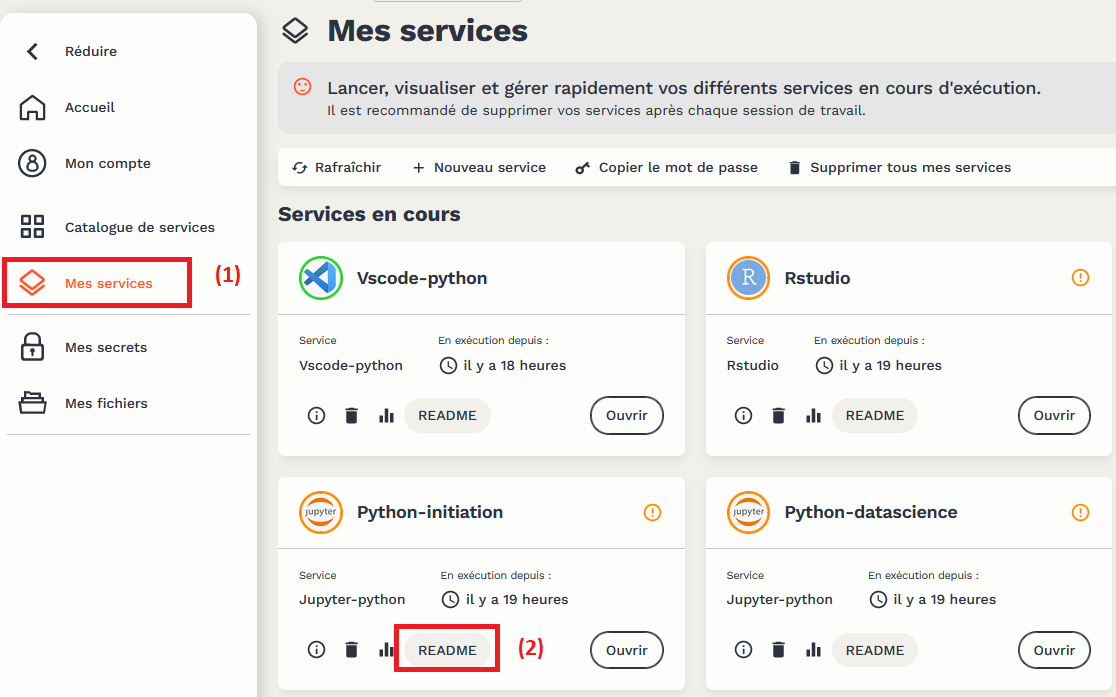

Il faut ensuite cliquer sur le lien ci-dessous:

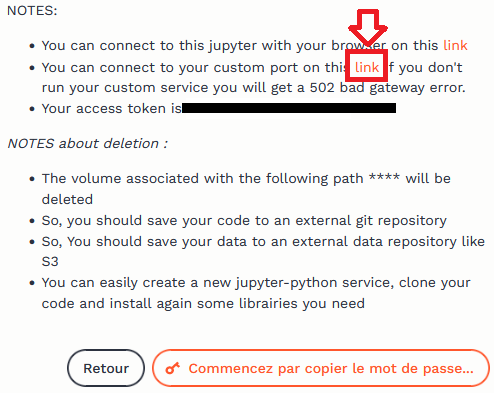

Cela va ouvrir un nouvel onglet sur votre navigateur où, cette fois,
vous aurez l’application. Chaque action que vous effectuerez sur
celle-ci déclenchera une opération dans la  
ligne de commande que vous avez lancée.

Pour le parcours 🟡, la voie s’arrête à ce niveau. Vous pouvez néanmoins
basculer du côté de la voie 🟢 pour apprendre de manière guidée à créer
votre application `Streamlit`.

Pour les parcours 🟢,🔵,🔴 et ⚫, vous allez pouvoir créer vous-même
l’application, de manière plus ou moins guidée.

## 4.2. Créer l’application dans un serveur temporaire (🟢,🔵,🔴,⚫)

Voici la gradation des niveaux pour créer l’application:

-   🟢: Lire et comprendre le contenu du fichier `app.py` qui génère
    l’application
-   🔵: Après avoir supprimé le fichier d’exemple `app.py`, mettre en
    oeuvre l’application avec des consignes guidées
-   🔴: Après avoir supprimé le fichier d’exemple `app.py`, mettre en
    oeuvre l’application à partir d’un cachier des charges détaillé
-   ⚫: Après avoir supprimé le fichier d’exemple `app.py`, mettre en
    oeuvre l’application uniquement à partir de l’exemple sur
    [myyuka.lab.sspcloud.fr/](https://myyuka.lab.sspcloud.fr/) et de la
    vidéo précédemment présentée. Idéalement, faire en sorte que le
    contenu du site soit *responsive* c’est-à-dire qu’il soit bien
    adapté à la taille de l’écran.

<!----- boite ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Créer l'application (⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Bon courage, force et honneur, tout ça tout ça…

</details>
</div>

<!----- end ⚫ ----->

<!----- boite 🔴 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Créer l'application (🔴)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Pour commencer, voici l’ensemble de l’environnement, que nous vous
proposons de prendre comme donné:

``` python
    import streamlit as st
    from streamlit_javascript import st_javascript
    
    import cv2
    import pandas as pd
    import duckdb
    
    from utils.detect_barcode import extract_ean, visualise_barcode
    from utils.pipeline import find_product_openfood
    from utils.construct_figures import plot_product_info
    from utils.utils_app import local_css, label_grade_formatter
    from utils.download_pb import import_coicop_labels
    
    # Une personnalisation sympa pour l'onglet
    st.set_page_config(page_title="PYuka", page_icon="🍎")
    
    
    # --------------------
    # METADATA
    indices_synthetiques = [
        "nutriscore_grade", "ecoscore_grade", "nova_group"
    ]
    principales_infos = [
        'product_name', 'code', 'preprocessed_labels', 'coicop', \
        'url', 'image_url'
    ]
    liste_colonnes = principales_infos + indices_synthetiques
    liste_colonnes_sql = [f"\"{s}\"" for s in liste_colonnes]
    liste_colonnes_sql = ', '.join(liste_colonnes_sql)
    
    con = duckdb.connect(database=':memory:')
    con.execute("""
        INSTALL httpfs;
        LOAD httpfs;
        SET s3_endpoint='minio.lab.sspcloud.fr'
    """)
    
    # LOAD DATASET
    url_data = "https://projet-funathon.minio.lab.sspcloud.fr/2023/sujet4/diffusion/openfood.parquet"
    stats_notes = pd.read_parquet("https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet4/diffusion/stats_notes_pandas.parquet")
    coicop = import_coicop_labels(
        "https://www.insee.fr/fr/statistiques/fichier/2402696/coicop2016_liste_n5.xls"
    )
    
    # --------------------
    
    
    st.title('Mon Yuka 🥕 avec Python 🐍')
    
    # Feuille de style & taille de l'écran pour adapter l'interface
    local_css("style.css")
    width = st_javascript(
        "window.innerWidth"
    )
```

1.  Si l’écran a une taille suffisante (on propose comme taille
    discriminante 500px),la partie gauche de l’écran est consacrée aux
    *inputs* (sinon c’est en haut de la page) :
    -   Un bouton permet à l’utilisateur de choisir sa méthode
        d’*upload* de photo: soit un *file uploader*, soit une capture à
        partir de la caméra
    -   Si l’écran a une taille suffisante, afficher l’image reconnue
    -   Créer une liste modifiable de statistiques à afficher à partir
        d’un sélecteur adapté. Pour formatter les champs à afficher,
        vous pouvez utiliser la fonction `label_grade_formatter` qui va,
        par exemple, transformer `nutriscore_grade` en `Nutriscore`
2.  Créer le corps principal de l’application avec les instructions
    suivantes:
    -   Créer une fonction enrobant `find_product_openfood` pour
        récupérer la donnée adaptée à partir d’un EAN. Nommé le
        `DataFrame` obtenu `subset`
    -   Utiliser `extract_ean` pour décoder l’image. Stocker l’objet en
        sortie d’`OpenCV` sous le nom `decoded_objects`
    -   A partir de l’objet `subset`: créer un texte qui renvoie vers
        l’URL du produit sur `OpenFoodFacts`, afficher l’image du
        produit, afficher le `DataFrame` dans l’interface de notre
        application
    -   Utiliser notre fonction de production de graphique pour afficher
        des statistiques descriptives à partir de notre choix d’options.

</details>
</div>

<!----- end 🔴 ----->

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Créer l'application (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Pour commencer, voici l’ensemble de l’environnement, que nous vous
proposons de prendre comme donné:

``` python
    import streamlit as st
    from streamlit_javascript import st_javascript
    
    import cv2
    import pandas as pd
    import duckdb
    
    from utils.detect_barcode import extract_ean, visualise_barcode
    from utils.pipeline import find_product_openfood
    from utils.construct_figures import plot_product_info
    from utils.utils_app import local_css, label_grade_formatter
    from utils.download_pb import import_coicop_labels
    
    # Une personnalisation sympa pour l'onglet
    st.set_page_config(page_title="PYuka", page_icon="🍎")
    
    
    # --------------------
    # METADATA
    indices_synthetiques = [
        "nutriscore_grade", "ecoscore_grade", "nova_group"
    ]
    principales_infos = [
        'product_name', 'code', 'preprocessed_labels', 'coicop', \
        'url', 'image_url'
    ]
    liste_colonnes = principales_infos + indices_synthetiques
    liste_colonnes_sql = [f"\"{s}\"" for s in liste_colonnes]
    liste_colonnes_sql = ', '.join(liste_colonnes_sql)
    
    con = duckdb.connect(database=':memory:')
    con.execute("""
        INSTALL httpfs;
        LOAD httpfs;
        SET s3_endpoint='minio.lab.sspcloud.fr'
    """)
    
    # LOAD DATASET
    url_data = "https://projet-funathon.minio.lab.sspcloud.fr/2023/sujet4/diffusion/openfood.parquet"
    stats_notes = pd.read_parquet("https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet4/diffusion/stats_notes_pandas.parquet")
    coicop = import_coicop_labels(
        "https://www.insee.fr/fr/statistiques/fichier/2402696/coicop2016_liste_n5.xls"
    )
    
    # --------------------
    
    
    st.title('Mon Yuka 🥕 avec Python 🐍')
    
    # Feuille de style & taille de l'écran pour adapter l'interface
    local_css("style.css")
    width = st_javascript(
        "window.innerWidth"
    )
```

<br> Nous proposons ensuite de construire ce fichier par étape

Etape 1: Construire la partie *inputs* en suivant le modèle à trou
suivant:

``` python
    if width > 500:
        # pour les grands écrans on met une partie à gauche
        # qui centralise plusieurs type d'input
        with st.sidebar:
            # 1. choix de la méthode d'upload
            if input_method == 'Photo enregistrée':
                # 2. file uploader
            else:
                # 3. camera uploader
            
            if input_url is not None:
                # visualise l'image s'il y a un input
                img = visualise_barcode(input_url)
                cv2.imwrite('barcode_opencv.jpg', img)
                # 4. afficher l'image
    
            # 5. choix des statistiques à afficher
    else:
        # pour les petits écrans (type smartphone)
        # le file uploader est au début
        # 1. choix de la méthode d'upload
        if input_method == 'Photo enregistrée':
            # 2. file uploader
        else:
            # 3. camera uploader
            picture = st.camera_input("Take a picture")
            input_url = picture
            # 5. choix des statistiques à afficher
```

<br>

Celui-ci est à remplir de la manière suivante:

1.  Créer un bouton qui permet à l’utilisateur de choisir sa méthode
    d’*upload* de photo. Celui-ci est à enregistrer sous le nom
    `input_method`
2.  Proposer un *file uploader* dont la valeur peut être utilisée sous
    le nom `input_url`
3.  Proposer un outil de capture de caméra dont la valeur peut être
    utilisée sous le nom `input_url`
4.  Si l’écran a une taille suffisante (on propose comme taille
    discriminante 500px), afficher l’image stockée dans le fichier
    temporaire `barcode_opencv.jpg`
5.  Créer une liste modifiable de statistiques à afficher à partir d’un
    sélecteur adapté. Pour formatter les champs à afficher, vous pouvez
    utiliser la fonction `label_grade_formatter` qui va, par exemple,
    transformer `nutriscore_grade` en `Nutriscore`

Etape 2: Construire la partie s’adaptant à ces *inputs* avec le modèle
suivant à trou suivant:

``` python
    # ----------------------------------------------------------
    # PARTIE 2: EXPLOITATION DES INPUTS DANS NOTRE APP
    
    
    # CHARGEMENT DE LA LIGNE DANS OPENFOODFACTS
    @st.cache_data
    def load_data(ean):
        # 1. Créer le DataFrame avec la fonction `find_product_openfood` 
        # openfood_data = 
        return openfood_data
    
    if input_url is None:
        # Showcase product
        st.write('Produit exemple: Coca-Cola')
        subset = load_data("5000112602791")
        decoded_objects = extract_ean(subset["image_url"].iloc[0])
    else:
        # 2. utiliser `extract_ean` pour décoder l'image
        # decoded_objects
        
    try:
        # 3. Récupérer l'EAN
        ean = decoded_objects[0].data.decode("utf-8")
        st.markdown(f'🎉 __EAN détecté__: <span style="color:Red">{ean}</span>', unsafe_allow_html=True)
        subset = load_data(ean)
        # 3. Mettre un lien avec l'URL du produit sur openfoodfacts
        # 4. Afficher l'image du produit
        # 5. Afficher le DataFrame
        # put some statistics
        t = f"<div>Statistiques parmi les <span class='highlight blue'>{subset['category'].iloc[0]}<span class='bold'>COICOP</span>"                
        st.markdown(t, unsafe_allow_html=True)
        # 6. Afficher les figures plotly
    except:
        # we don't manage to get EAN
        st.write('🚨 Problème de lecture de la photo, essayez de mieux cibler le code-barre')
        st.image("https://i.kym-cdn.com/entries/icons/original/000/025/458/grandma.jpg")
```

Voici des indications pour compléter ces trous:

1.  Créer une fonction enrobant `find_product_openfood` pour récupérer
    la donnée adaptée à partir d’un EAN
2.  Utiliser `extract_ean` pour décoder l’image. Stocker l’objet en
    sortie d’`OpenCV` sous le nom `decoded_objects`
3.  A partir de l’objet `subset`, créer un texte qui renvoie vers l’URL
    du produit sur `OpenFoodFacts`
4.  Afficher l’image du produit, l’URL étant la variable adéquate de
    `subset`
5.  Afficher le `DataFrame` dans l’interface de notre application
6.  Utiliser notre fonction de production de graphique pour afficher des
    statistiques descriptives à partir de notre choix d’options.

</details>
</div>

<!----- end 🔵 ----->

Voici une proposition d’application, afin de reproduire en local le
contenu de [myyuka.lab.sspcloud.fr/](https://myyuka.lab.sspcloud.fr/).

In [85]:
# Solution pour la voie 🟢
with open('app.py', 'r') as file:
    app_content = file.read()

print(
    app_content
)

import streamlit as st
from streamlit_javascript import st_javascript

import cv2
import pandas as pd
import duckdb

from utils.detect_barcode import extract_ean, visualise_barcode
from utils.pipeline import find_product_openfood
from utils.construct_figures import plot_product_info
from utils.utils_app import local_css, label_grade_formatter
from utils.download_pb import import_coicop_labels

# Une personnalisation sympa pour l'onglet
st.set_page_config(page_title="PYuka", page_icon="🍎")


# --------------------
# METADATA
indices_synthetiques = [
    "nutriscore_grade", "ecoscore_grade", "nova_group"
]
principales_infos = [
    'product_name', 'code', 'preprocessed_labels', 'coicop', \
    'url', 'image_url'
]
liste_colonnes = principales_infos + indices_synthetiques
liste_colonnes_sql = [f"\"{s}\"" for s in liste_colonnes]
liste_colonnes_sql = ', '.join(liste_colonnes_sql)

con = duckdb.connect(database=':memory:')
con.execute("""
    INSTALL httpfs;
    LOAD httpfs;
    SET s3_endp

## 4.3. En marche vers la mise en production (🟢,🔵,🔴,⚫)

Pour le parcours 🟢, la voie s’arrête à ce niveau. Vous pouvez néanmoins
basculer du côté de la voie 🔵 pour apprendre de manière guidée à mettre
en production votre travail en déployant automatiquement une
application.

Pour les parcours 🔵,🔴 et ⚫, vous allez pouvoir déployer vous-même
l’application, de manière plus ou moins guidée.

# 5️⃣ Déploiement de l’application interactive

## 5.1. Préliminaires (🔵,🔴,⚫)

L’application construite dans la partie précédente reste pour le moment
à un niveau local: elle n’est accessible que via l’utilisateur qui l’a
déployée et ce sur la machine où elle a été déployée. L’objectif de
cette dernière partie est de **déployer** l’application, c’est à dire de
la rendre accessible en continu à n’importe quel utilisateur. Pour cela,
on va devoir s’intéresser à la technologie des **conteneurs**, qui est à
la base des infrastructures de production modernes.

Le fait de lancer ce notebook via un simple [lien de
lancement](LIEN%20A%20METTRE) nous a permis de commencer à travailler
directement, sans trop nous soucier de l’environnement de développement
dans lequel on se trouvait.

Mais dès lors que l’on souhaite passer de son environnement de
développement à un environnement de production, il est nécessaire de se
poser un ensemble de questions pour s’assurer que le projet fonctionne
ailleurs que sur sa machine personnelle :

-   quelle est la version de `Python` à installer pour que le projet
    fonctionne ?
-   quels sont les packages `Python` utilisés par le projet et quelles
    sont leurs versions ?
-   quelles sont les éventuelles librairies systèmes, i.e. dépendantes
    du système d’exploitation installé, nécessaires pour que les
    packages `Python` s’installent correctement ?

La technologie standard pour assurer la **portabilité** d’un projet,
c’est à dire de fonctionner sur différents environnements informatiques,
est celle des **conteneurs**. Schématiquement, il s’agit de boîtes
virtuelles qui contiennent l’ensemble de l’environnement (librairies
systèmes, interpréteur `Python`, code applicatif, configuration…)
permettant de faire tourner l’application, tout en restant légères et
donc faciles à redistribuer. En fait, chaque service lancé sur le
`SSP Cloud` est un conteneur, et ce notebook tourne donc lui-même… dans
un conteneur !

L’enjeu de cette partie est donc de dévoiler pas à pas la boîte noire
afin de comprendre dans quel environnement on se trouve, et comment
celui-ci va nous permettre de déployer notre application.

## 5.2. Conteneurisation de l’application (🔵,🔴,⚫)

<!----- boite 🔵 ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #1976d2;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Comprendre la création de l'image `Docker` de l'application (🔵)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Le projet contient à la racine un fichier `Dockerfile`. Il s’agit de la
“recette” de construction de l’image `Docker` de l’application, i.e. qui
spécifie l’environnement nécessaire à son bon fonctionnement.

En vous inspirant de la [documentation
Streamlit](https://docs.streamlit.io/knowledge-base/tutorials/deploy/docker#create-a-dockerfile)
(en Anglais) ou bien de cette [page de
cours](https://ensae-reproductibilite.github.io/website/chapters/portability.html#dockerfile),
essayez de comprendre pas à pas les étapes de construction de l’image
`Docker` de l’application.

</details>
</div>

<!----- end 🔵 ----->

<!----- boite 🔴, ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Créer le `Dockerfile` de l'application (🔴, ⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Une image `Docker` est construite à partir d’un fichier spécifique
généralement placé à la racine du projet, le `Dockerfile`. Sans regarder
le `Dockerfile` existant dans le projet, et en vous inspirant de la
[documentation
Streamlit](https://docs.streamlit.io/knowledge-base/tutorials/deploy/docker#create-a-dockerfile)
(en Anglais), essayez de construire le `Dockerfile` pertinent pour
l’application, puis comparez votre solution à l’existant.

Quelques consignes supplémentaires :

-   on utilisera comme image de base
    `inseefrlab/onyxia-jupyter-python:py3.10.9`
-   on se mettra en utilisateur *root* via l’[instruction
    USER](https://docs.docker.com/engine/reference/builder/#user)
-   on aura besoin d’installer les librairies système suivantes via
    `apt-get` : `ffmpeg, libsm6, libxext6, libzbar0`
-   on copiera tous les fichiers du projet local sur l’image `Docker` à
    l’aide de l’[instruction
    COPY](https://docs.docker.com/engine/reference/builder/#copy)
-   on fera tourner l’application sur le port `8000` du conteneur (qu’il
    faudra donc prendre soin d’exposer)
-   on ne fera pas de `HEALTHCHECK`

</details>
</div>

<!----- end 🔴, ⚫ ----->

<!----- boite ⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #424242;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Construire l'image `Docker` de l'application par intégration continue (⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

Une fois le `Dockerfile` construit (du moins sa première version), on va
l’utiliser pour construire une image `Docker` (la “boîte” virtuelle) et
mettre celle-ci sur un registre (répertoire d’images) afin que celle-ci
puisse être réutilisée dans un autre environnement que celui où on l’a
développée.

On pourrait faire cela “à la main” en ligne de commandes
(cf. [documentation
Docker](https://docs.docker.com/get-started/02_our_app/)), mais on va
plutôt automatiser le processus en passant par un *pipeline* (série
d’étapes) d’intégration continue.

Ainsi, à chaque mise à jour du code source de l’application (nouvelles
fonctionnalités, correction de bugs, etc.), notre image sera
automatiquement mise à jour.

Les étapes à suivre sont les suivantes :

-   si nécessaire, créer un compte personnel sur
    [GitHub](https://github.com) et sur le
    [DockerHub](https://hub.docker.com/) (registre d’images open-source)
-   bien s’assurer que le `Dockerfile` obtenu à l’étape précédente est
    identique à celui existant dans le projet
-   [forker](https://docs.github.com/fr/get-started/quickstart/fork-a-repo)
    le [dépôt du
    projet](https://github.com/InseeFrLab/funathon2023_sujet4) afin de
    l’avoir dans votre espace personnel sur `GitHub`
-   [cloner](https://docs.github.com/fr/repositories/creating-and-managing-repositories/cloning-a-repository)
    le dépôt forké (i.e. de la forme
    `votre_nom_utilisateur_gh/funathon2023_sujet4`) via un terminal
-   créer un nouveau dépôt public sur le `DockerHub`
-   créer les secrets `DOCKERHUB_USERNAME` et `DOCKERHUB_TOKEN`
    (cf. [documentation
    Docker](https://docs.docker.com/build/ci/github-actions/#step-one-create-the-repository)),
    nécessaires pour que le CI `GitHub` puisse pousser une image sur le
    `DockerHub`
-   ajuster le fichier d’intégration continue
    (`.github/workflows/docker.yaml`) pour que le dépôt sur lequel est
    envoyé l’image ne soit plus `inseefrlab/funathon2023_sujet4` mais
    `votre_nom_utilisateur_dh/funathon2023_sujet4`
-   *commit*/*push* les changements sur `GitHub`
-   si tout s’est bien passé, une action devrait se lancer (cf. onglet
    `Actions` du dépôt) afin de construire l’image et de l’envoyer sur
    le `DockerHub`
-   si l’action s’est bien déroulée (flèche verte), aller vérifier que
    l’image est bien disponible dans votre espace sur le `DockerHub`

</details>
</div>

<!----- end ⚫ ----->

## 5.3. Déploiement sur le `SSP Cloud`

Maintenant que l’image de notre application est disponible sur le
`DockerHub`, elle peut à présent être récupérée (*pull*) et déployée sur
n’importe quel environnement. Dans notre cas, on va la déployer sur un
cluster `Kubernetes`, l’infrastructure sous-jacente du `SSP Cloud`. Le
fonctionnement de `Kubernetes` est assez technique, mais l’on pourra
s’abstraire de certaines parties selon le niveau de difficulté choisi.

<!----- boite 🔴,⚫ ----->

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #9c9797;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Déploiement de l'application à partir du `DockerHub` `InseeFrLab` (🔴,⚫)</h3>


<details>
<summary>Dérouler pour révéler les instructions</summary>

En amont de ce projet, nous avons construit une image `Docker`
fonctionnelle de l’application, disponible sur le `DockerHub` dans
l’espace
[inseefrlab](https://hub.docker.com/repository/docker/inseefrlab/funathon2023_sujet4).
Nous avons également créés dans le répertoire `deployment/` à la racine
du projet les trois fichiers standards nécessaires au déploiement d’une
application sur `Kubernetes`.

Afin de déployer l’application, suivre les instructions suivantes :

-   inspecter les fichiers `deployment.yml`, `service.yml` et
    `ingress.yml` et repérer les éléments suivants :
    -   où est spécifiée l’image que l’on va déployer. Pour la
        difficulté ⚫: remplacer l’image actuelle par celle que vous
        avez construite et envoyée sur le `DockerHub` dans la partie
        précédente
    -   où sont spécifiées les ressources computationnelles que l’on va
        allouer à l’application
    -   où est défini le port que l’on a exposé dans le `Dockerfile`.
        Pour la difficulté ⚫: si vous n’avez pas exposé l’application
        sur le port `8000`, modifier cette ligne
    -   où est défini le port sur lequel on va exposer l’application sur
        le cluster `Kubernetes`
    -   où est définie l’URL à laquelle on va exposer l’application pour
        que les utilisateurs puissent s’y connecter. La modifier (à 2
        reprises) pour y indiquer une adresse personalisée pour votre
        déploiement. Seule contrainte : elle doit être de la forme :
        `*.lab.sspcloud.fr`
-   ouvrir un terminal dans le service `Jupyter`
-   se placer dans le projet du funathon : `cd funathon2023_sujet4`
-   appliquer les contrats de déploiement :
    `kubernetes apply -f deployment/`
-   vérifier le lancement du conteneur : `watch kubernetes get pods`. Le
    nom associé devrait être de la forme
    `funathon2023-sujet4-****-*****`
-   une fois que le conteneur est indiqué comme `Running`, entrer dans
    un navigateur l’URL que vous avez spécifié dans le fichier
    `ingress.yml`, et vérifier que l’application fonctionne correctement

</details>
</div>

<!----- end 🔴,⚫ ----->

Votre application est maintenant déployée, vous pouvez partager cette
URL avec n’importe quel utilisateur dans le monde !

## Bonus: le parcours 🟣

Un dernier *challenge* pour les amateurs de sensations fortes : créer la
même application sur un site *web* statique grâce au *web assembly* (par
exemple grâce à `Observable` et `Quarto`) !

Pour avoir un site web statique, l’identification du code-barre devra
être faite en dehors de l’application, par exemple par le moyen d’une
API